## Major Assignment 1 
### Environmental Analysis Tools (ENEN90032) 
#### Authors: Olivia Borgstroem (1049030), Navindu de Silva (1084196), Robert Strong (1080043) 
#### Created: 22/08/2022
#### Last Edited: 22/08/2022

This is a notebook which complete the tasks outlined in 2022_ENEN90032_Assignment_01.pdf

In [445]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from tabulate import tabulate
import statistics

## Task 1 Exploratory Data Analysis - Meteorological Datasets

### Question 1

In [446]:
#Imports required for both question 1 and 2
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
from tabulate import tabulate
import statistics
import matplotlib.pyplot as plt

In [447]:
perth = pd.read_csv('Perth.csv')
darwin = pd.read_csv('Darwin.csv')
melbourne = pd.read_csv('Melbourne.csv')

In [448]:
perth_rain = perth["Rainfall amount (millimetres)"]
darwin_rain = darwin["Rainfall amount (millimetres)"]
melbourne_rain = melbourne["Rainfall amount (millimetres)"]

# Use wet day daily rainfall and exclude values lower than 0.25mm detection limit
perth_rain = perth_rain[perth_rain > 0.25]
darwin_rain = darwin_rain[darwin_rain > 0.25]
melbourne_rain = melbourne_rain[melbourne_rain > 0.25]

### Task 1.1

In [449]:
#Find the sample means of all three locations 

pmean = np.mean(perth_rain)
dmean = np.mean(darwin_rain)
mmean = np.mean(melbourne_rain)

#Find the median of all three locations

pmed = np.median(perth_rain)
dmed = np.median(darwin_rain)
mmed = np.median(melbourne_rain)


In [450]:
#Find quartiles
P25 = np.quantile(perth_rain, 0.25)
P50 = np.quantile(perth_rain, 0.50)
P75 = np.quantile(perth_rain, 0.75)

D25 = np.quantile(darwin_rain, 0.25)
D50 = np.quantile(darwin_rain, 0.50)
D75 = np.quantile(darwin_rain, 0.75)

M25 = np.quantile(melbourne_rain, 0.25)
M50 = np.quantile(melbourne_rain, 0.50)
M75 = np.quantile(melbourne_rain, 0.75)

#Find the trimean of all three locations
Ptrimean = (P25 + 2 * P50 + P75)/4
Dtrimean = (D25 + 2 * D50 + D75)/4
Mtrimean = (M25 + 2 * M50 + M75)/4

#Find the IQR of all three locations
PIQR = (P75 - P25)
DIQR = (D75 - D25)
MIQR = (M75 - M25)

#Find the sample standard deviation of all three locations#
PSD = statistics.stdev(perth_rain)
DSD = statistics.stdev(darwin_rain)
MSD = statistics.stdev(melbourne_rain)

#Find the median absolute deviation of all three locations#
PMAD = stats.median_abs_deviation(perth_rain)
DMAD = stats.median_abs_deviation(darwin_rain)
MMAD = stats.median_abs_deviation(melbourne_rain)

In [451]:
#Find the sample skewness of all three locations
Pskew = float(stats.skew(perth_rain))
Dskew = float(stats.skew(darwin_rain))
Mskew = float(stats.skew(melbourne_rain))

#Find the Yule-Kendall index of all three locations
PYK = (P25 + P75- (2*P50))/(P75 - P25)
DYK = (D25 + D75- (2*D50))/(D75 - D25)
MYK = (M25 + M75- (2*M50))/(M75 - M25)

# Put them into a table
table = [['Item', 'Perth', 'Darwin', 'Melbourne'], ['Sample mean', pmean, dmean, mmean],
         ['Median', pmed, dmed, mmed], ['Trimean', Ptrimean, Dtrimean,Mtrimean],
        ['Sample standard deviation', PSD, DSD,MSD],['IQR', PIQR, DIQR, MIQR],['Median absolute deviation', PMAD,DMAD,MMAD],
        ['Sample skewness', Pskew, Dskew, Mskew],['Yule-Kendall Index', PYK, DYK, MYK]]
print(tabulate(table))

-------------------------  ------------------  ------------------  ------------------
Item                       Perth               Darwin              Melbourne
Sample mean                6.775757575757575   19.076595744680855  6.32089552238806
Median                     3.8                 7.6                 2.9
Trimean                    4.475               10.431249999999999  3.3
Sample standard deviation  7.726829628243146   25.46930864609578   9.583947062524555
IQR                        7.1                 22.025              5.4
Median absolute deviation  2.8                 6.8                 2.3
Sample skewness            1.8555071586749758  1.8913486293430952  2.8461069532351693
Yule-Kendall Index         0.380281690140845   0.5141884222474461  0.2962962962962964
-------------------------  ------------------  ------------------  ------------------


### Task 1.2 (and Task 1.3 done at the same time)

Optimal bin size (rule of thumb) = 3.223041606722699


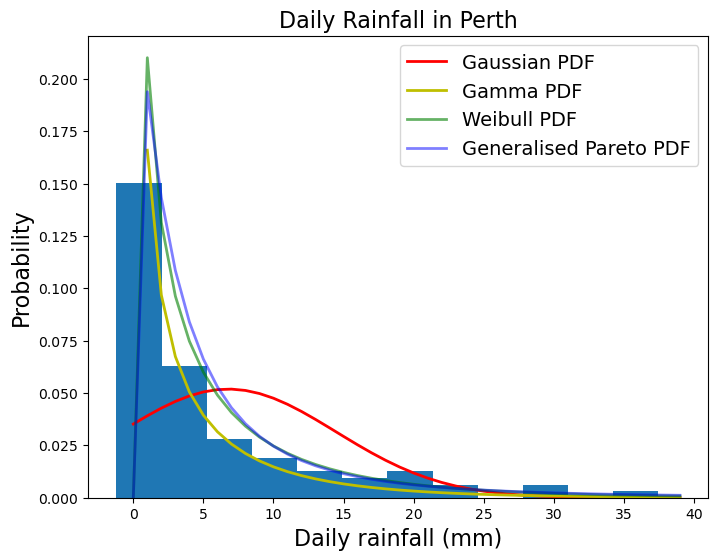

In [452]:
#For the wet-day daily rainfall data, fit i) a Gaussian, ii) a gamma, and iii) a Weibull2 distribution functions (also do Task 1.3) 

##For Perth
optbin = 2.1 * (P75 - P25 ) / (len(perth_rain)**(1/3))
print('Optimal bin size (rule of thumb) =', optbin)
plt.figure(figsize=(8,6))
plt.hist(perth_rain, bins = np.arange(np.min(perth_rain), np.max(perth_rain) + optbin, optbin), density = True, histtype = 'bar', align = 'left')
plt.xlabel('Daily rainfall (mm)', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.title('Daily Rainfall in Perth', fontsize=16)

#Gaussian PDF fitted to the data
x = list(range(0, 40, 1)) #range of x axis values - should be same as the perth_rain 
pdf = stats.norm.pdf(x, loc = np.mean(perth_rain), scale = np.std(perth_rain))
plt.plot(x, pdf, label = 'Gaussian PDF', lw = 2, c = 'r')

#Gamma PDF - bounded by low values  
shape_g, loc, scale_g = stats.gamma.fit(perth_rain) #loc is only needed if you need to shift the distribution
#print(shape, loc, scale) 
pdf = stats.gamma.pdf(x, a = shape_g, scale = scale_g) #a is alpha and scale is 1/beta
plt.plot(x, pdf, label = 'Gamma PDF', lw = 2, c = 'y')

#Weibull PDF - bound by minimum
c = perth_rain
mean, var, skew = stats.weibull_min.fit(c)
plt.plot(x, stats.weibull_min.pdf(x, mean, var, skew),'g', lw=2, alpha=0.6, label='Weibull PDF')

#Generalised Pareto fit (Task 1.3)
c = perth_rain
mean, var, skew = stats.genpareto.fit(c)
plt.plot(x, stats.genpareto.pdf(x,mean, var, skew),'b', lw=2, alpha=0.5, label='Generalised Pareto PDF')
plt.legend(loc=0, fontsize=14)
plt.savefig('1_P')
plt.show()

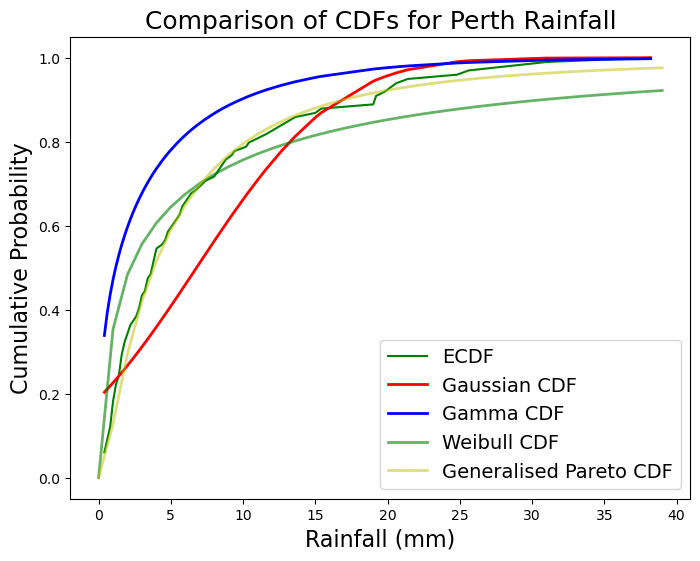

In [453]:
#comparison of empirical CDFS for Perth rainfall

def ecdf(perth_rain):

    # convert data to a numpy array
    data = np.atleast_1d(perth_rain) #Scalar inputs are converted to 1-dimensional arrays, whilst higher-dimensional inputs are preserved.

    # find the unique values and their corresponding frequency or counts
    loc, counts = np.unique(perth_rain, return_counts=True) #https://numpy.org/doc/stable/reference/generated/numpy.unique.html

    # now converting the freq to ecdf
    cum_prob = np.cumsum(counts).astype(np.double) / data.size

    return loc, cum_prob

a,b = ecdf(perth_rain)

# Let's plot CDFs 
plt.figure(figsize=(8,6))
plt.plot(a, b, lw=1.5, color='g', label='ECDF') #plot ecdf

plt.plot(a, stats.norm.cdf(a, loc = np.mean(perth_rain), scale = np.std(perth_rain)), lw=2, color='r', label='Gaussian CDF') #plot Gaussian cdf

plt.plot(a, stats.gamma.cdf(a, a = shape_g, scale = scale_g), lw=2, color='b', label='Gamma CDF') #plot Gamma cdf

plt.plot(x, stats.weibull_min.cdf(x, mean, var, skew),'g', lw=2, alpha=0.6, label='Weibull CDF')

plt.plot(x, stats.genpareto.cdf(x,mean, var, skew),'y', lw=2, alpha=0.5, label='Generalised Pareto CDF') #Task 1.3


plt.legend(loc=0, fontsize=14)
plt.title('Comparison of CDFs for Perth Rainfall', fontsize=18)
plt.xlabel('Rainfall (mm)', fontsize=16)
plt.ylabel('Cumulative Probability', fontsize=16)

plt.savefig('2_P')
plt.show()


Shape of data used for Q-Q plot = (100, 1)
 


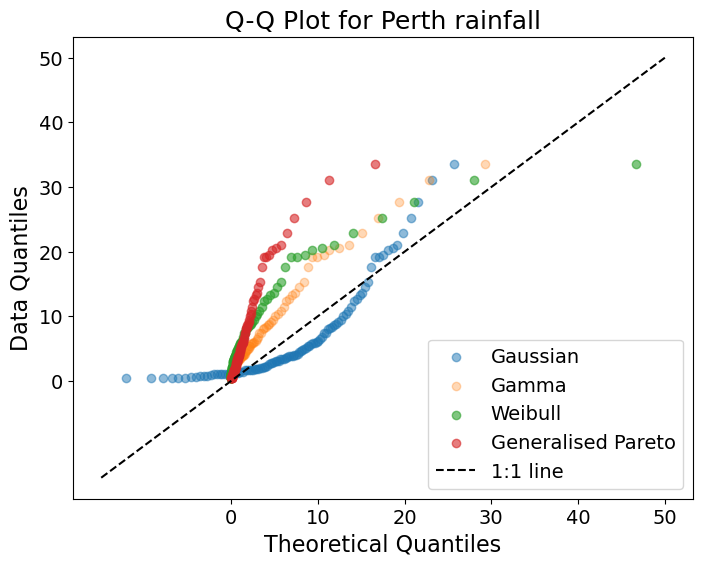

In [454]:
#Q-Q plot for evaluation for Perth

# A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. 
# If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. 

n = 100 #100 points 
Q_data = np.empty((n,1)) * np.nan #quantiles in data 


Q_gamma = np.empty((n,1)) * np.nan #quantiles in Gamma distribution
Q_gauss = np.empty((n,1)) * np.nan #quantiles in Gasssian distribution
Q_weibull = np.empty((n,1)) * np.nan #quantiles in Gasssian distribution
Q_genpareto = np.empty((n,1)) * np.nan # Task 1.3 quantiles in Generalised Pareto distribuition

#create samples from Gaussian, Gamma and Weibull (and Genpareto) distribution
gauss_data = np.random.normal(loc=np.mean(perth_rain), scale=np.std(perth_rain), size=10000)
gamma_data = np.random.gamma(shape_g, scale=scale_g, size=10000)  #mean and std of the dist
weibull_data = np.random.weibull(mean, size=10000)
genpareto_data = stats.genpareto.rvs(mean, size=10000)

for i in range(1, n+1, 1): # from 1 to n
    p = (i - 1/3) / (n + 1/3) # plotting location
    Q_data[i-1] = np.quantile(perth_rain, p)
    Q_gamma[i-1] = np.quantile(gamma_data, p)
    Q_gauss[i-1] = np.quantile(gauss_data, p)
    Q_weibull[i-1] = np.quantile(weibull_data, p)
    Q_genpareto[i-1] = np.quantile(genpareto_data, p)
    

print('Shape of data used for Q-Q plot =', Q_gamma.shape); print(' ')
plt.figure(figsize = (8,6))
plt.scatter(Q_gauss , Q_data, alpha = 0.5,label='Gaussian')
plt.scatter(Q_gamma , Q_data, alpha = 0.3,label='Gamma')
plt.scatter(Q_weibull , Q_data, alpha = 0.6,label='Weibull')
plt.scatter(Q_genpareto , Q_data, alpha = 0.6,label='Generalised Pareto')
plt.plot([-15, 50], [-15, 50], '--k', label = '1:1 line')
plt.legend(loc=0, fontsize = 14)
plt.title('Q-Q Plot for Perth rainfall', fontsize=18)
plt.xticks(np.arange(0,51,10), fontsize = 14)
plt.yticks(np.arange(0,51,10), fontsize = 14)
plt.xlabel('Theoretical Quantiles', fontsize=16)
plt.ylabel('Data Quantiles', fontsize=16)
plt.savefig('3_P')
plt.show()

Optimal bin size (rule of thumb) = 10.17245851223418


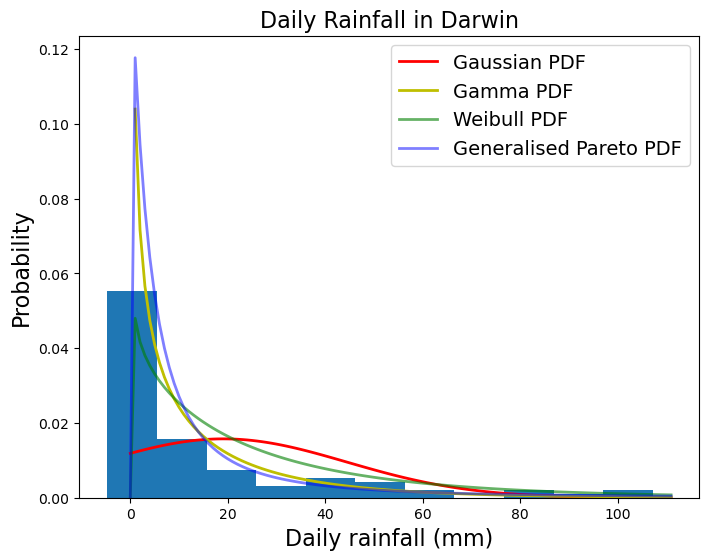

In [455]:
# For the wet-day daily rainfall data, fit i) a Gaussian, ii) a gamma, and iii) a Weibull2 distribution functions 

##For Darwin

optbin = 2.1 * (D75 - D25 ) / (len(darwin_rain)**(1/3))
print('Optimal bin size (rule of thumb) =', optbin)
plt.figure(figsize=(8,6))
plt.hist(darwin_rain, bins = np.arange(np.min(darwin_rain), np.max(darwin_rain) + optbin, optbin), density = True, histtype = 'bar', align = 'left')

plt.xlabel('Daily rainfall (mm)', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.title('Daily Rainfall in Darwin', fontsize=16)

#Gaussian PDF fitted to the data
x = list(range(0, 112, 1)) #range of x axis values - should be same as the darwin_rain 
pdf = stats.norm.pdf(x, loc = np.mean(darwin_rain), scale = np.std(darwin_rain))
plt.plot(x, pdf, label = 'Gaussian PDF', lw = 2, c = 'r')

#Gamma PDF - bounded by low values  
shape_g, loc, scale_g = stats.gamma.fit(darwin_rain) #loc is only needed if you need to shift the distribution
#print(shape, loc, scale) 
pdf = stats.gamma.pdf(x, a = shape_g, scale = scale_g) #a is alpha and scale is 1/beta
plt.plot(x, pdf, label = 'Gamma PDF', lw = 2, c = 'y')

#Weibull PDF - bound by minimum
c = darwin_rain
mean, var, skew = stats.weibull_min.fit(c)
plt.plot(x, stats.weibull_min.pdf(x, mean, var, skew),'g', lw=2, alpha=0.6, label='Weibull PDF')


#Generalised Pareto fit (Task 1.3)
c = darwin_rain
mean, var, skew = stats.genpareto.fit(c)
plt.plot(x, stats.genpareto.pdf(x,mean, var, skew),'b', lw=2, alpha=0.5, label='Generalised Pareto PDF')

plt.legend(loc=0, fontsize=14)
plt.savefig('1_D')
plt.show()


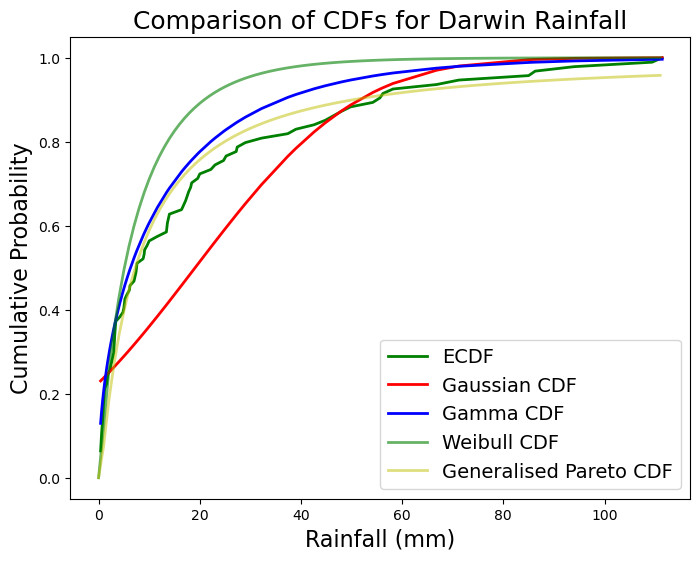

In [456]:
#comparison of empirical CDFS for Darwin rainfall

def ecdf(darwin_rain):

    # convert data to a numpy array
    data = np.atleast_1d(darwin_rain) #Scalar inputs are converted to 1-dimensional arrays, whilst higher-dimensional inputs are preserved.

    # find the unique values and their corresponding frequency or counts
    loc, counts = np.unique(darwin_rain, return_counts=True) #https://numpy.org/doc/stable/reference/generated/numpy.unique.html

    # now converting the freq to ecdf
    cum_prob = np.cumsum(counts).astype(np.double) / data.size

    return loc, cum_prob

a,b = ecdf(darwin_rain)

# Let's plot CDFs 
plt.figure(figsize=(8,6))
plt.plot(a, b, lw=2, color='g', label='ECDF') #plot ecdf

plt.plot(a, stats.norm.cdf(a, loc = np.mean(darwin_rain), scale = np.std(darwin_rain)), lw=2, color='r', label='Gaussian CDF') #plot Gaussian cdf

plt.plot(a, stats.gamma.cdf(a, a = shape_g, scale = scale_g), lw=2, color='b', label='Gamma CDF') #plot Gamma cdf

plt.plot(x, stats.weibull_min.cdf(x, mean, var, skew),'g', lw=2, alpha=0.6, label='Weibull CDF')
plt.plot(x, stats.genpareto.cdf(x,mean, var, skew),'y', lw=2, alpha=0.5, label='Generalised Pareto CDF') #Task 1.3



plt.legend(loc=0, fontsize=14)
plt.title('Comparison of CDFs for Darwin Rainfall', fontsize=18)

plt.xlabel('Rainfall (mm)', fontsize=16)
plt.ylabel('Cumulative Probability', fontsize=16)
plt.savefig('2_D')
plt.show()



Shape of data used for Q-Q plot = (100, 1)
 


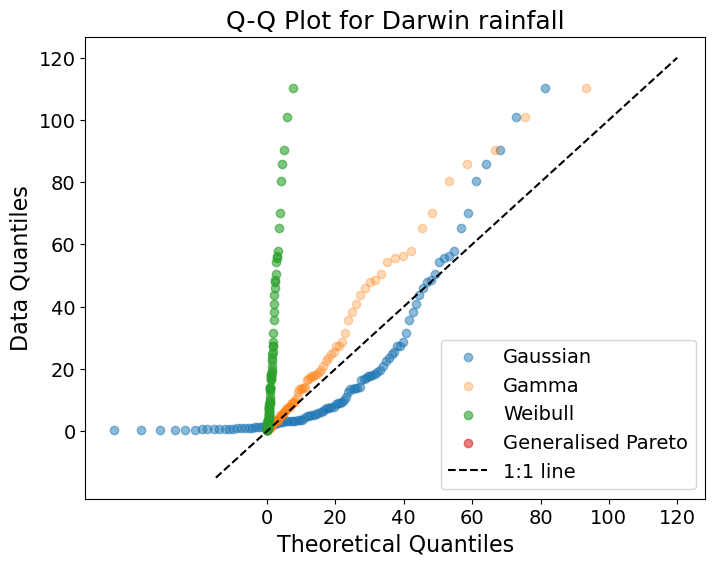

In [457]:
#Q-Q plot for evaluation for Darwin
n = 100 #100 points 
Q_data = np.empty((n,1)) * np.nan #quantiles in data 


Q_gamma = np.empty((n,1)) * np.nan #quantiles in Gamma distribution
Q_gauss = np.empty((n,1)) * np.nan #quantiles in Gasssian distribution
Q_weibull = np.empty((n,1)) * np.nan #quantiles in Gasssian distribution
Q_genpareto = np.empty((n,1)) * np.nan # Task 1.3 quantiles in Generalised Pareto distribuition

#create samples from Gaussian, Gamma and Weibull distribution
gauss_data = np.random.normal(loc=np.mean(darwin_rain), scale=np.std(darwin_rain), size=10000)
gamma_data = np.random.gamma(shape_g, scale=scale_g, size=10000)  #mean and std of the dist
weibull_data = np.random.weibull(mean, size=10000)
genpareto_data = stats.genpareto.rvs(mean, size=10000) #(Task 1.3)

for i in range(1, n+1, 1): # from 1 to n
    p = (i - 1/3) / (n + 1/3) # plotting location
    Q_data[i-1] = np.quantile(darwin_rain, p)
    Q_gamma[i-1] = np.quantile(gamma_data, p)
    Q_gauss[i-1] = np.quantile(gauss_data, p)
    Q_weibull[i-1] = np.quantile(weibull_data, p)

print('Shape of data used for Q-Q plot =', Q_gamma.shape); print(' ')
plt.figure(figsize = (8,6))
plt.scatter(Q_gauss , Q_data, alpha = 0.5,label='Gaussian')
plt.scatter(Q_gamma , Q_data, alpha = 0.3,label='Gamma')
plt.scatter(Q_weibull , Q_data, alpha = 0.6,label='Weibull')
plt.scatter(Q_genpareto , Q_data, alpha = 0.6,label='Generalised Pareto')
plt.plot([-15, 120], [-15, 120], '--k', label = '1:1 line')
plt.legend(loc=4, fontsize = 14)
plt.title('Q-Q Plot for Darwin rainfall', fontsize=18)
plt.xticks(np.arange(0,121,20), fontsize = 14)
plt.yticks(np.arange(0,121,20), fontsize = 14)
plt.xlabel('Theoretical Quantiles', fontsize=16)
plt.ylabel('Data Quantiles', fontsize=16)
plt.savefig('3_D')
plt.show()



Optimal bin size (rule of thumb) = 2.216042686696742


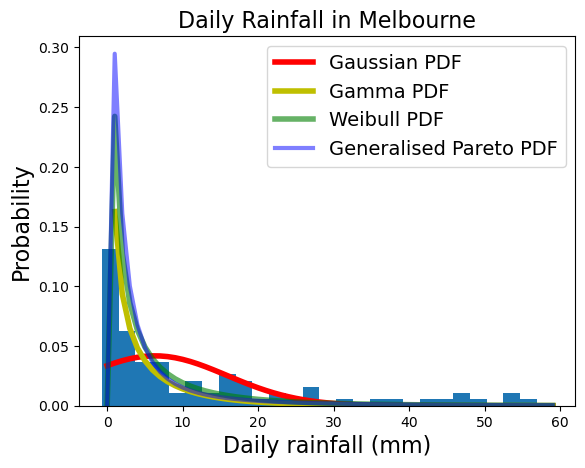

In [458]:
#. For the wet-day daily rainfall data, fit i) a Gaussian, ii) a gamma, and iii) a Weibull2 distribution functions 

##For Melbourne 

optbin = 2.1 * (M75 - M25 ) / (len(melbourne_rain)**(1/3))
print('Optimal bin size (rule of thumb) =', optbin)
plt.figure()
plt.hist(darwin_rain, bins = np.arange(np.min(melbourne_rain), np.max(melbourne_rain) + optbin, optbin), density = True, histtype = 'bar', align = 'left')

plt.xlabel('Daily rainfall (mm)', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.title('Daily Rainfall in Melbourne', fontsize=16)

#Gaussian PDF fitted to the data
x = list(range(0, 60, 1)) #range of x axis values - should be same as the melbourne_rain 
pdf = stats.norm.pdf(x, loc = np.mean(melbourne_rain), scale = np.std(melbourne_rain))
plt.plot(x, pdf, label = 'Gaussian PDF', lw = 4, c = 'r')

#Gamma PDF - bounded by low values  
shape_g, loc, scale_g = stats.gamma.fit(melbourne_rain) #loc is only needed if you need to shift the distribution
#print(shape, loc, scale) 
pdf = stats.gamma.pdf(x, a = shape_g, scale = scale_g) #a is alpha a
plt.plot(x, pdf, label = 'Gamma PDF', lw = 4, c = 'y')

#Weibull PDF - bound by minimum
c = melbourne_rain
mean, var, skew = stats.weibull_min.fit(c)
plt.plot(x, stats.weibull_min.pdf(x, mean, var, skew),'g', lw=4, alpha=0.6, label='Weibull PDF')


#Generalised Pareto fit (Task 1.3)
c = melbourne_rain
mean, var, skew = stats.genpareto.fit(c)
plt.plot(x, stats.genpareto.pdf(x,mean, var, skew),'b', lw=3, alpha=0.5, label='Generalised Pareto PDF')

plt.legend(loc=0, fontsize=14)
plt.savefig('1_M')
plt.show()

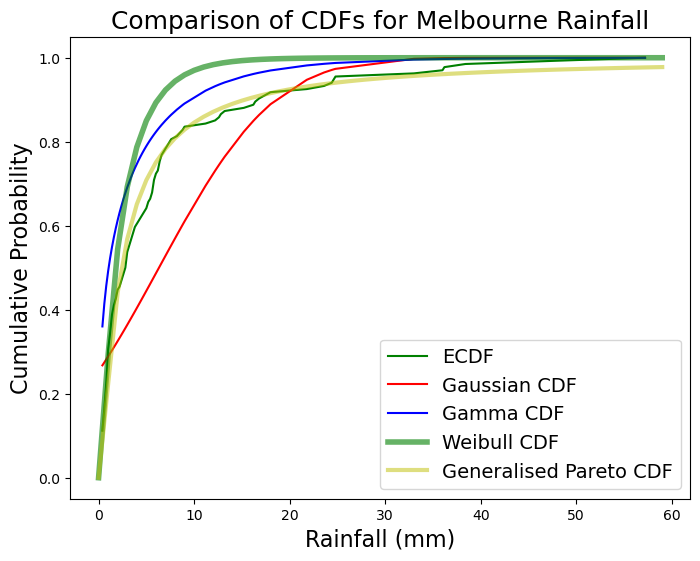

In [459]:
#comparison of empirical CDFS for Melbourne rainfall

def ecdf(melbourne_rain):

    # convert data to a numpy array
    data = np.atleast_1d(melbourne_rain) #Scalar inputs are converted to 1-dimensional arrays, whilst higher-dimensional inputs are preserved.

    # find the unique values and their corresponding frequency or counts
    loc, counts = np.unique(melbourne_rain, return_counts=True) #https://numpy.org/doc/stable/reference/generated/numpy.unique.html

    # now converting the freq to ecdf
    cum_prob = np.cumsum(counts).astype(np.double) / data.size

    return loc, cum_prob

a,b = ecdf(melbourne_rain)

# Let's plot CDFs 
plt.figure(figsize=(8,6))
plt.plot(a, b, lw=1.5, color='g', label='ECDF') #plot ecdf

plt.plot(a, stats.norm.cdf(a, loc = np.mean(melbourne_rain), scale = np.std(melbourne_rain)), lw=1.5, color='r', label='Gaussian CDF') #plot Gaussian cdf

plt.plot(a, stats.gamma.cdf(a, a = shape_g, scale = scale_g), lw=1.5, color='b', label='Gamma CDF') #plot Gamma cdf

plt.plot(x, stats.weibull_min.cdf(x, mean, var, skew),'g', lw=4, alpha=0.6, label='Weibull CDF')

plt.plot(x, stats.genpareto.cdf(x,mean, var, skew),'y', lw=3, alpha=0.5, label='Generalised Pareto CDF') #Task 1.3


plt.legend(loc=0, fontsize=14)
plt.title('Comparison of CDFs for Melbourne Rainfall', fontsize=18)

plt.xlabel('Rainfall (mm)', fontsize=16)
plt.ylabel('Cumulative Probability', fontsize=16)
plt.savefig('2_M')
plt.show()

Shape of data used for Q-Q plot = (100, 1)
 


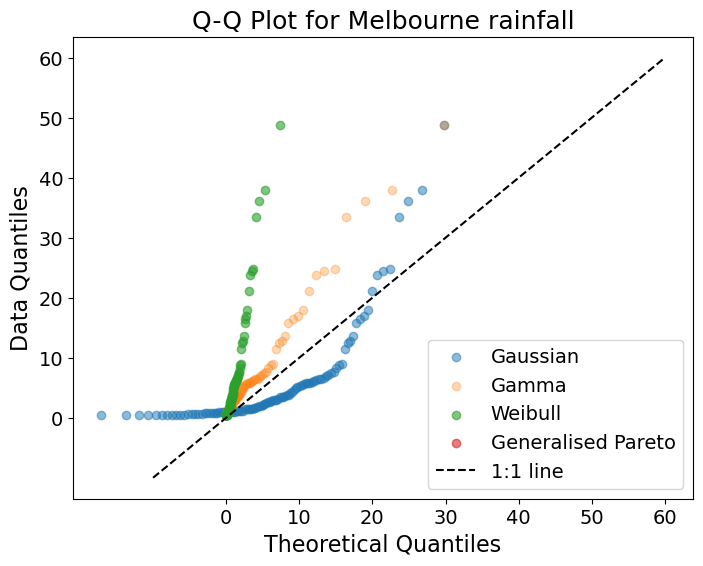

In [460]:
#Q-Q plot for evaluation for Melbourne

n = 100 #100 points 
Q_data = np.empty((n,1)) * np.nan #quantiles in data 


Q_gamma = np.empty((n,1)) * np.nan #quantiles in Gamma distribution
Q_gauss = np.empty((n,1)) * np.nan #quantiles in Gasssian distribution
Q_weibull = np.empty((n,1)) * np.nan #quantiles in Gasssian distribution
Q_genpareto = np.empty((n,1)) * np.nan # Task 1.3 quantiles in Generalised Pareto distribuition

#create samples from Gaussian, Gamma and Weibull distribution
gauss_data = np.random.normal(loc=np.mean(melbourne_rain), scale=np.std(melbourne_rain), size=10000)
gamma_data = np.random.gamma(shape_g, scale=scale_g, size=10000)  #mean and std of the dist
weibull_data = np.random.weibull(mean, size=10000)
genpareto_data = stats.genpareto.rvs(mean, size=10000) #Task 1.3

for i in range(1, n+1, 1): # from 1 to n
    p = (i - 1/3) / (n + 1/3) # plotting location
    Q_data[i-1] = np.quantile(melbourne_rain, p)
    Q_gamma[i-1] = np.quantile(gamma_data, p)
    Q_gauss[i-1] = np.quantile(gauss_data, p)
    Q_weibull[i-1] = np.quantile(weibull_data, p)

print('Shape of data used for Q-Q plot =', Q_gamma.shape); print(' ')
plt.figure(figsize = (8,6))
plt.scatter(Q_gauss , Q_data, alpha = 0.5,label='Gaussian')
plt.scatter(Q_gamma , Q_data, alpha = 0.3,label='Gamma')
plt.scatter(Q_weibull , Q_data, alpha = 0.6,label='Weibull')
plt.scatter(Q_genpareto , Q_data, alpha = 0.6,label='Generalised Pareto')
plt.plot([-10, 60], [-10, 60], '--k', label = '1:1 line')
plt.legend(loc=4, fontsize = 14)
plt.title('Q-Q Plot for Melbourne rainfall', fontsize=18)
plt.xticks(np.arange(0,61,10), fontsize = 14)
plt.yticks(np.arange(0,61,10), fontsize = 14)
plt.xlabel('Theoretical Quantiles', fontsize=16)
plt.ylabel('Data Quantiles', fontsize=16)
plt.savefig('3_M')
plt.show()


### Task 1.3

In [461]:
# Generalised Pareto fit
##NOTE THIS WAS DONE SIMULTANEOUSLY WITH TASK 1.2###

### Task 1.4

In [462]:
# Calculate the log-likelihood values of the PERTH fits

Gamma_LogL = stats.gamma.logpdf(perth_rain, a = shape_g, scale = scale_g).sum()
print('Gamma negative loglikelihood = ', -Gamma_LogL)
Gaussian_LogL = stats.norm.logpdf(perth_rain, np.mean(perth_rain), np.std(perth_rain)).sum()
print('Gaussian negative loglikelihood = ' ,-Gaussian_LogL)
Weibull_LogL = stats.weibull_min.logpdf(perth_rain, mean).sum()
print('Weibull negative loglikelihood = ' ,-Weibull_LogL)
Genpareto_LogL = stats.genpareto.logpdf(perth_rain, mean).sum()
print('Gen Pareto negative loglikelihood = ' ,-Genpareto_LogL)

#maximizing log likelihood is equivalent to minimizing "negative log likelihood"

Gamma negative loglikelihood =  323.76194087831306
Gaussian negative loglikelihood =  342.3975377420192
Weibull negative loglikelihood =  492.91098214787036
Gen Pareto negative loglikelihood =  331.3602542584712


In [463]:
# Calculate the log-likelihood values of the DARWIN fits

Gamma_LogL = stats.gamma.logpdf(darwin_rain, a = shape_g, scale = scale_g).sum()
print('Gamma negative loglikelihood = ', -Gamma_LogL)
Gaussian_LogL = stats.norm.logpdf(darwin_rain, np.mean(darwin_rain), np.std(darwin_rain)).sum()
print('Gaussian negative loglikelihood = ' ,-Gaussian_LogL)
Weibull_LogL = stats.weibull_min.logpdf(darwin_rain, mean).sum()
print('Weibull negative loglikelihood = ' ,-Weibull_LogL)
Genpareto_LogL = stats.genpareto.logpdf(darwin_rain, mean).sum()
print('Gen Pareto negative loglikelihood = ' ,-Genpareto_LogL)

Gamma negative loglikelihood =  471.30796806103143
Gaussian negative loglikelihood =  437.20011314124565
Weibull negative loglikelihood =  1039.887822328894
Gen Pareto negative loglikelihood =  433.7083532954306


In [464]:
# Calculate the log-likelihood values of the MELBOURNE fits

Gamma_LogL = stats.gamma.logpdf(melbourne_rain, a = shape_g, scale = scale_g).sum()
print('Gamma negative loglikelihood = ', -Gamma_LogL)
Gaussian_LogL = stats.norm.logpdf(melbourne_rain, np.mean(melbourne_rain), np.std(melbourne_rain)).sum()
print('Gaussian negative loglikelihood = ' ,-Gaussian_LogL)
Weibull_LogL = stats.weibull_min.logpdf(melbourne_rain, mean).sum()
print('Weibull negative loglikelihood = ' ,-Weibull_LogL)
Genpareto_LogL = stats.genpareto.logpdf(melbourne_rain, mean).sum()
print('Gen Pareto negative loglikelihood = ' ,-Genpareto_LogL)

Gamma negative loglikelihood =  407.5324228108411
Gaussian negative loglikelihood =  492.48788383300734
Weibull negative loglikelihood =  608.4245572232674
Gen Pareto negative loglikelihood =  398.7216268162783


## Task 2 Daily Max Temperature at Melbourne and Es- sendon Airports

In [465]:
tullamarine = pd.read_csv('Tullamarine.csv')
essendon = pd.read_csv('Essendon.csv')

tullamarine = tullamarine["Maximum temperature (Degree C)"]
essendon = essendon["Maximum temperature (Degree C)"]

In [466]:
#Check if there are NaN values 
print('Any Tulla NaN values? (True/False):', tullamarine.isnull().values.any()) #check nan values
print('Any Essen NaN values? (True/False):', essendon.isnull().values.any()) #check nan values

Any Tulla NaN values? (True/False): False
Any Essen NaN values? (True/False): False


In [467]:
#Set dataframe with both sites in one
df1=pd.DataFrame(tullamarine)
df2=pd.DataFrame(essendon)

df1.rename(columns ={df1.columns[0]:"Tullamarine"}, inplace = True)
df2.rename(columns ={df2.columns[0]:"Essendon"}, inplace = True)

data = pd.concat([df1, df2], axis=1, join='inner')

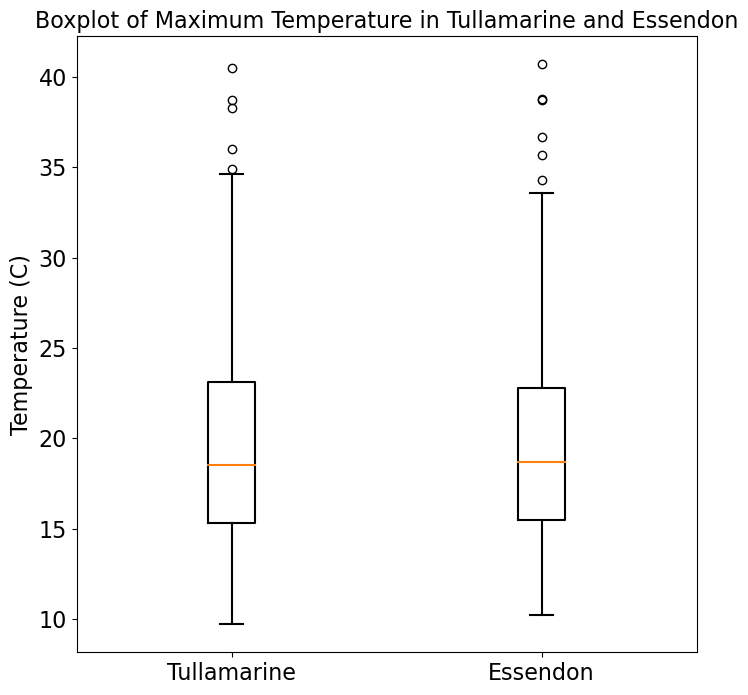

In [481]:
#Try the box plot
header = list(data.columns) #col name

plt.figure(figsize=(8,8))
#change box plot properties 
boxprop = dict(linestyle='-', linewidth=1.5)
medianprop = dict(linestyle='-', linewidth=1.5)
medianprop = dict(linestyle='-', linewidth=1.5)
data.boxplot(column=header, labels=header, grid=False, fontsize=16, boxprops=boxprop,medianprops=medianprop, whiskerprops = medianprop, capprops = medianprop, showfliers=True)
plt.ylabel('Temperature (C)', fontsize=16)
plt.title('Boxplot of Maximum Temperature in Tullamarine and Essendon', fontsize=16)
plt.savefig('boxplot.png',dpi=300)
plt.show()

In [480]:
## p-value based method for comparison of means 

# Calculate the difference between the sample means
mean_diff = np.mean(data['Tullamarine']) - np.mean(data['Essendon'])  # mean(tullamarine) - mean(essendon)
print('Difference between two sample mean values =', mean_diff)


# Calculate the std 
s1 = np.std(data['Tullamarine'],ddof=1)
s2 = np.std(data['Essendon'],ddof=1)
print('Stdev1 =', s1, ', Stdev2 =', s2)


# The size of each group 
n=365

S1 = np.sqrt((s1**2/n) + (s2**2/n))

#Z value
t_stat = mean_diff/S1
print('t value =', t_stat)

t_dist = stats.t(df=n+n-2) #create a z-table of df degree of freedom

pvalue = 1 - t_dist.cdf(t_stat)
print('p-value =', pvalue)

Difference between two sample mean values = -0.10301369863013932
Stdev1 = 5.795328658637816 , Stdev2 = 5.707015405461555
t value = -0.2419676217535968
p-value = 0.5955633022408524


## Task 3 Newcomb-Michelson Velocity of Light Experiments

In [470]:
light_df = pd.read_csv('NewcombLight.txt', header=None)
distance = 7442 # m at sea level
wikipedia_speed = 299792458 # m/s accessed from https://en.wikipedia.org/wiki/Speed_of_light

light_df = distance/ light_df
light_df.columns = ["speed"] 
light_mean = np.mean(light_df.speed)


# T-test
light_t = stats.ttest_1samp(light_df, light_mean, alternative='two-sided', )
print("Sample Mean = {} m/s".format(light_mean))
print("T-test pvalue = {}".format(light_t.pvalue[0])) 
## pvalue is very large (~= 1) hence accept that the null hypothesis (that mean is correct)


# Bootstrap
light_b_data = (light_df,)
light_bootstrap_ci = stats.bootstrap(light_b_data, np.mean, confidence_level=0.99, random_state=1, method='percentile')
print("99% CI from Bootstrap: ({}, {})".format(light_bootstrap_ci.confidence_interval[0][0], 
                                               light_bootstrap_ci.confidence_interval[1][0]))

print("Speed of Light (Wikipedia, 2022) = {} m/s".format(wikipedia_speed))
print("Percentage Error Sample Mean and Wikipedia = {}%".format(abs((light_mean-wikipedia_speed)/light_mean *100)))
print("Percentage Error q0.5 Bootstrap and Wikipedia = {}%".format(
    abs(((light_bootstrap_ci.confidence_interval[0][0] +
          light_bootstrap_ci.confidence_interval[1][0])/2-wikipedia_speed)
        /(light_bootstrap_ci.confidence_interval[0][0] 
          + light_bootstrap_ci.confidence_interval[1][0])/2 *100)))


Sample Mean = 299763868.09810716 m/s
T-test pvalue = 1.0
99% CI from Bootstrap: (299731082.5421092, 299814979.065918)
Speed of Light (Wikipedia, 2022) = 299792458 m/s
Percentage Error Sample Mean and Wikipedia = 0.00953747430410256%
Percentage Error q0.5 Bootstrap and Wikipedia = 0.0016201587526306926%


## Task 4 Space Shuttle O-Ring Failures

In [471]:
temps = pd.read_excel("O_Ring_Data.XLS")
temps

,INCIDENTS,LAUNCH
0,1,COOL
1,1,COOL
2,1,COOL
3,3,COOL
4,0,WARM
5,0,WARM
6,0,WARM
7,0,WARM
8,0,WARM
9,0,WARM


## Task 5 Cloud Seeding Experiment

## Task 6 Exploratory Data Analysis and Linear Regression

Pearson Correlation Coefficient =  0.7952444358034054
Spearman’s Rank Correlation Coefficient =  0.7357368827895879
Logged Data Pearson Correlation Coefficient =  0.8313600860823945
Logged Data Spearman’s Rank Correlation Coefficient =  0.7357368827895879


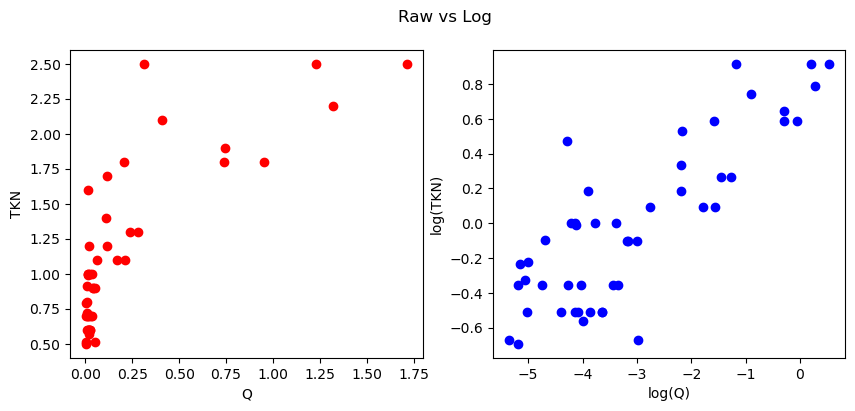

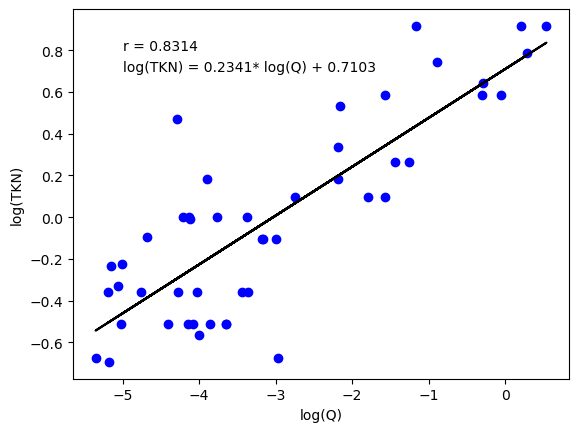

In [472]:
Ndata = pd.read_csv('/Users/RobStrong/Desktop/EAT/Ass1/Q_TKN_data.csv')
Ndata = Ndata.rename(columns={"Q (mm/d)":"Q", "TKN (mg/L)":"TKN"})

N_person = stats.pearsonr(Ndata.Q, Ndata.TKN)
N_spearman = stats.spearmanr(Ndata.Q, Ndata.TKN)
print("Pearson Correlation Coefficient = ",N_person.statistic)
print("Spearman’s Rank Correlation Coefficient = ", N_spearman.correlation)

N_log_person = stats.pearsonr(np.log(Ndata.Q), np.log(Ndata.TKN))
N_log_spearman = stats.spearmanr(np.log(Ndata.Q), np.log(Ndata.TKN))
print("Logged Data Pearson Correlation Coefficient = ",N_log_person.statistic)
print("Logged Data Spearman’s Rank Correlation Coefficient = ", N_log_spearman.correlation)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax1.scatter(Ndata.Q, Ndata.TKN, c='r')
ax1.set_xlabel('Q')
ax1.set_ylabel('TKN')
ax2.scatter(np.log(Ndata.Q), np.log(Ndata.TKN), c='b')
ax2.set_xlabel('log(Q)')
ax2.set_ylabel('log(TKN)')
plt.suptitle('Raw vs Log')
plt.show()


# Linear Regression (using log transformed data)
N_slope, N_intercept, N_r, N_p, N_se = stats.linregress(np.log(Ndata.Q), np.log(Ndata.TKN))

# predicting TKN at Q = 2mm 
TKN_log_predicted = (N_slope * np.log(2)) + N_intercept # log(y) = m*log(x) + c
TKN_predicted = np.exp(TKN_log_predicted) # transforming back to original domain
TKN_predicted

# 95% CI on Conditional Mean and Prediction

plt.figure()
plt.scatter(np.log(Ndata.Q), np.log(Ndata.TKN), c='b')
plt.plot(np.log(Ndata.Q), N_slope*np.log(Ndata.Q)+ N_intercept, 'k-')
plt.xlabel('log(Q)')
plt.ylabel('log(TKN)')
plt.text(-5,0.8, s="r = " + str(np.round(N_r,4)))
plt.text(-5,0.7, s="log(TKN) = " + str(np.round(N_slope,4)) + "* log(Q) + " + str(np.round(N_intercept,4)))
plt.show()


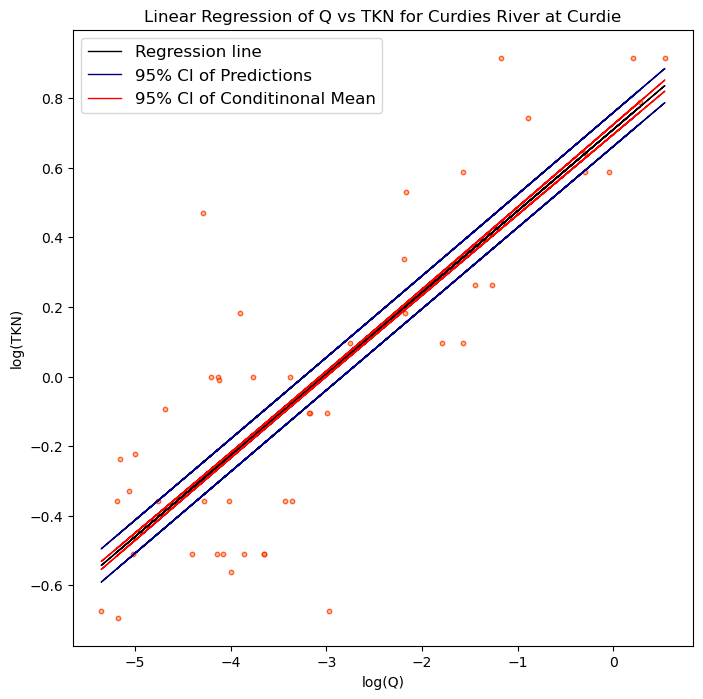

In [473]:
N = len(Ndata)
X = np.log(Ndata.Q)
meanX = np.mean(X)
Yhat = N_slope * X + N_intercept

SE_CI_95 = N_se * np.sqrt(1/N + ((X - meanX)**2 / np.sum((X-meanX)**2)))
SE_PredCI = N_se  * np.sqrt( 1 + 1/N + ((X - meanX)**2 / np.sum((X-meanX)**2)))

# Plot the regression line with 95% CI of predicted values and 95% CI of conditional mean
t_dist  = stats.t(N-2)

# Add regression line to scatter plot 
plt.figure(figsize=(8,8))
plt.scatter(np.log(Ndata.Q), np.log(Ndata.TKN), s = 10, color='orange', alpha=0.6, edgecolor='red', linewidth=1)
plt.xlabel('log(Q)')
plt.ylabel('log(TKN)')
plt.title('Linear Regression of Q vs TKN for Curdies River at Curdie')
plt.plot(X, Yhat, lw = 1, c = 'k', label = 'Regression line') #regression line plotting from sklearn 

# Prediction CI
plt.plot(X, Yhat + t_dist.ppf(0.975)*SE_PredCI, c = 'navy', lw=1, label = '95% CI of Predictions') #upper limit
plt.plot(X, Yhat + t_dist.ppf(0.025)*SE_PredCI, c = 'navy', lw=1, label = None) #lower limit

# Conditional mean CI
plt.plot(X, Yhat + t_dist.ppf(0.975)*SE_CI_95, c = 'red', lw=1, label = '95% CI of Conditinonal Mean') #upper limit
plt.plot(X, Yhat + t_dist.ppf(0.025)*SE_CI_95, c = 'red', lw=1, label = None) #lower limit
plt.legend(loc = 0, fontsize=12)
plt.show()

In [474]:
count = 0
predictions_upper = Yhat + t_dist.ppf(0.975)*SE_PredCI
predictions_lower = Yhat + t_dist.ppf(0.025)*SE_PredCI


for i in range(len(Ndata)):
    if (np.log(Ndata.TKN[i]) > predictions_lower[i] and np.log(Ndata.TKN[i]) < predictions_upper[i]):
        count += 1

count # = 6

6

## Task 7 Atmospheric CO2 Concentration during Global Forced Confinement by COVID-19ced Confinement by COVID-19

<AxesSubplot:xlabel='Date'>

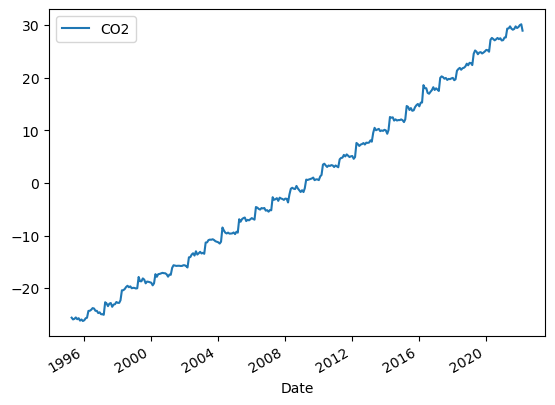

In [475]:
from cmath import nan

# Reading-in and Cleaning Dataframe
co2 = pd.read_csv('/Users/RobStrong/Desktop/EAT/Ass1/monthly_in_situ_co2_mlo.csv', skiprows=54)

# Remvoing Redundant Columns and Rows
co2 = co2.drop([0,1])
cols = [2,3,5,6,7,8,9]
co2.drop(co2.columns[cols],axis=1,inplace=True)

# Creating Pandas Datetime
co2['day'] = 15
co2 = co2.rename(columns={"  Yr": "year", " Mn":"month", "     CO2": "CO2"})
co2['Date'] = pd.to_datetime(co2[['year', 'month', 'day']])

# Remvoing Redundant Date Columns
cols = [0,1,3]
co2.drop(co2.columns[cols],axis=1,inplace=True)
co2df = co2.set_index("Date")
co2df = co2df['1995-04-15':'2022-03-15']
co2df['CO2'].mask(co2df['CO2'] == -99.99,np.nan, inplace=True) # removing missing values which are denoted by -99.99                                                          
co2df['CO2'] = pd.to_numeric(co2df['CO2']) # converting to floats

# # Calculating Monthly Arithmetic Means
# monthy_mean = co2df.groupby(co2df.index.month)['CO2'].mean()


# Remove Seasonality
co2df_noseason = co2df.groupby(co2df.index.month).transform(lambda g: g - g.mean()) 
co2df_noseason.plot()


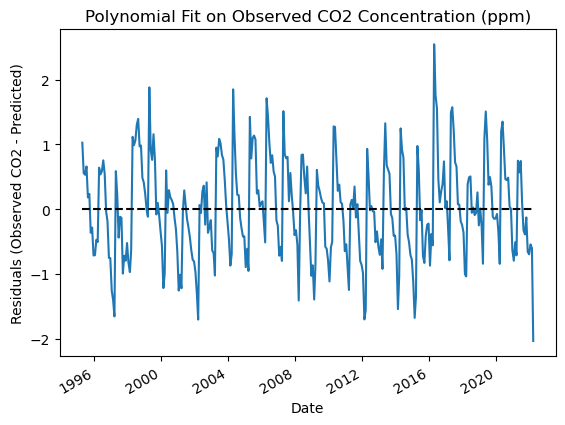

In [476]:
# Remove Trend

# Numpy Polynomial Fitting
X = co2df_noseason.index
X = np.array(range(0,len(X)))
Y = co2df_noseason.CO2
trend = np.polyfit(x=X, y=Y, deg=2)

# Predicted Values
co2_hat = (X**2)*trend[0] + X*trend[1] + trend[2]

# Calculating Residuals (observed - predicted)
co2_residuals = co2df_noseason['CO2'] - co2_hat
co2df_noseason['Residuals'] = co2df_noseason['CO2'] - co2_hat

# Quick Plot
co2df_noseason.Residuals.plot()
plt.plot([co2df_noseason.index.min(), co2df_noseason.index.max()],[0,0], 'k--')
plt.title('Polynomial Fit on Observed CO2 Concentration (ppm)')
plt.ylabel('Residuals (Observed CO2 - Predicted)')
plt.show()